IMPORTING THE DEPENDENCIES

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [98]:
# Loading the data from csv file to pandas dataframe
Car_data = pd.read_csv("car data.csv")

In [99]:
# inspecting the first 5 rows of the dataframe
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [100]:
# inspecting the last 5 rows of the dataframe
Car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [101]:
# checking the number of rows and columns
Car_data.shape

(301, 9)

In [102]:
# gettin information about the dataset

Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking the number of missing values

Car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checking the distribution of categorical data

print(Car_data.Fuel_Type.value_counts())
print(Car_data.Seller_Type.value_counts())
print(Car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


ENCODING THE CATEGORICAL DATA

In [9]:
# Encoding 'Fuel_Type' Column
Car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding 'Seller_Type' Column
Car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding 'Transmission' Column
Car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING THE DATA AND TARGET

In [60]:
X = Car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = Car_data['Selling_Price']

In [61]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [62]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [63]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=32)

MODEL TRAINING

1.Linear regression

In [64]:
# Loading the linear regression model

lin_reg_model = LinearRegression()

In [65]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

MODEL EVALUATION

In [19]:
# Prediction on Training data

Training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
# R Squared error

error_score = metrics.r2_score(Y_train,Training_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8793569045268861


VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES

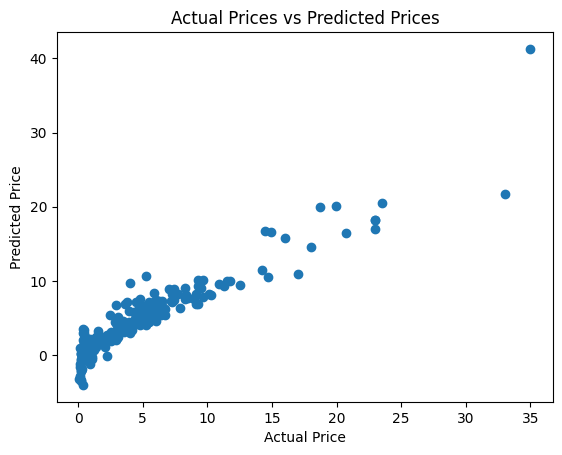

In [21]:
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [22]:
# Prediction on Training data

Testing_data_prediction = lin_reg_model.predict(X_test)

In [23]:
# R Squared error

error_score = metrics.r2_score(Y_test,Testing_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8601730290390227


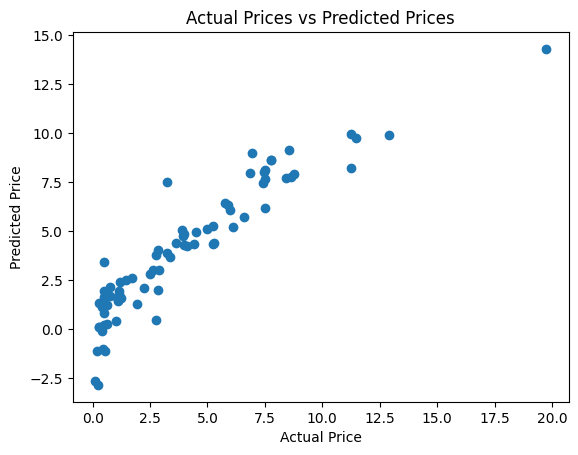

In [24]:
plt.scatter(Y_test, Testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2.Lasso Regression

In [25]:
# Loading the lasso regression model

lass_reg_model = Lasso()

In [26]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

MODEL EVALUATION

In [27]:
# Prediction on Training data

Training_data_prediction = lass_reg_model.predict(X_train)

In [28]:
# R Squared error

error_score = metrics.r2_score(Y_train,Training_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8429477536647181


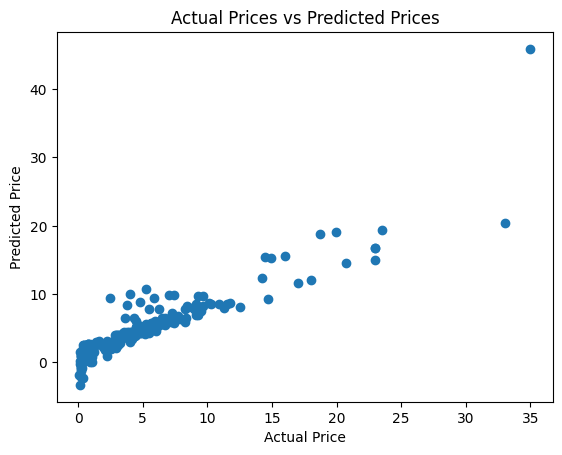

In [29]:
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [30]:
# Prediction on Training data

Testing_data_prediction = lass_reg_model.predict(X_test)

In [31]:
# R Squared error

error_score = metrics.r2_score(Y_test,Testing_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8522658492764174


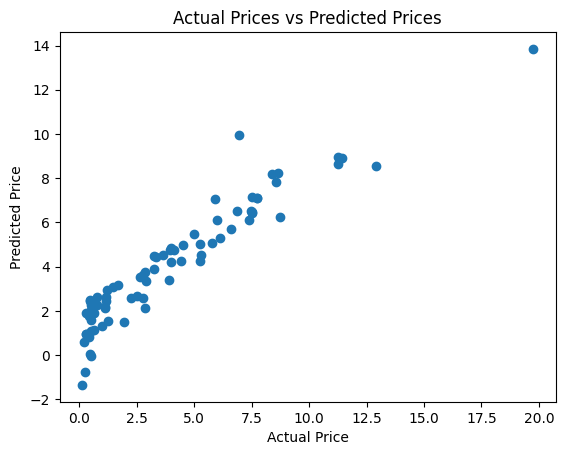

In [32]:
plt.scatter(Y_test, Testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

3.Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [41]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [43]:
Tree_prediciton = tree.predict(X_train)

In [45]:

error_score = metrics.r2_score(Y_train,Tree_prediciton)
print('R squared Error: ', error_score)

R squared Error:  1.0


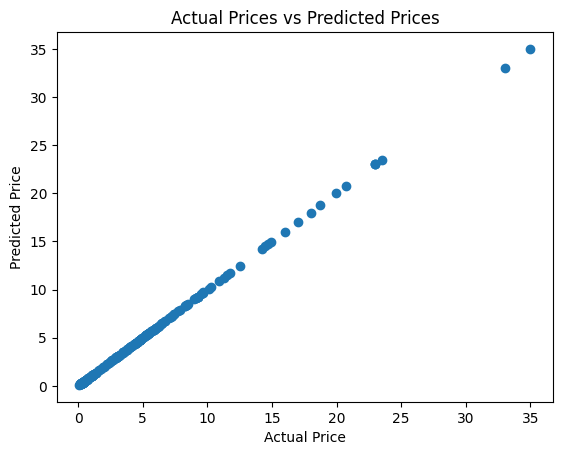

In [46]:
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

## Prediciton System

In [47]:
import joblib
joblib.dump("tree","Car-price-predic")

['Car-price-predic']

In [48]:
model1 = joblib.load("Car-price-predic")

In [70]:
X_train.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [73]:
'''
'Petrol':0,'Diesel':1,'CNG':2

# Encoding 'Seller_Type' Column
'Dealer':0,'Individual':1

# Encoding 'Transmission' Column
'Manual':0,'Automatic':1 '''

"\n'Petrol':0,'Diesel':1,'CNG':2\n\n# Encoding 'Seller_Type' Column\n'Dealer':0,'Individual':1\n\n# Encoding 'Transmission' Column\n'Manual':0,'Automatic':1 "

In [72]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
222,2014,7.60,77632,1,0,0,0
33,2014,9.95,45000,1,0,0,0
217,2016,4.43,15000,0,0,0,0
46,2013,4.89,64532,0,0,0,0
216,2016,4.43,12500,0,0,0,0


In [81]:
loaded_model.score(X_test,Y_test)

0.9532279539732048

In [84]:
y_preds = tree.predict(X_test)
y_preds

array([ 8.25, 11.25,  2.65,  8.4 ,  7.05,  4.75,  1.1 ,  0.25,  0.9 ,
        0.55,  4.35,  7.25,  0.5 ,  0.6 ,  3.35,  5.25,  0.35,  6.  ,
        0.5 ,  3.75,  7.45, 12.5 ,  1.65,  0.78,  1.35,  4.5 ,  0.45,
        0.25,  3.  ,  3.9 ,  1.1 ,  3.  ,  0.3 ,  3.15,  5.25,  2.25,
        1.1 ,  0.45, 10.11,  8.5 ,  3.5 ,  4.5 ,  6.7 ,  6.4 ,  4.5 ,
        1.65,  0.2 ,  7.25,  2.55,  4.5 ,  0.35,  0.65,  4.9 ,  0.4 ,
        6.4 ,  5.25,  0.42, 17.  ,  5.95,  7.25,  6.25,  0.6 , 10.9 ,
        1.15,  0.2 ,  1.2 ,  7.25,  4.15,  5.8 ,  0.45,  3.75,  0.45,
        4.75,  1.15,  4.  ,  2.  ])

In [74]:
Year = input()
Present_Price = input()
Kms_Driven = input()
Fuel_Type = input()
Seller_Type = input()
Transmission = input()
Owner = input()

In [75]:
row_df = pd.DataFrame([pd.Series([Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner])])

In [76]:
row_df

,0,1,2,3,4,5,6
0,2014,7.66,78652,2,1,1,0


In [83]:
loaded_model.predict(row_df)[0]

c:\Users\GM-RAO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


6.0

In [79]:
import pickle
pickle.dump(tree,open("car-price.pkl","wb"))

In [90]:
with open('car-price.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [80]:
loaded_model = pickle.load(open("car-price.pkl", "rb"))
loaded_model.predict(X_test)

array([ 8.25, 11.25,  2.65,  8.4 ,  7.05,  4.75,  1.1 ,  0.25,  0.9 ,
        0.55,  4.35,  7.25,  0.5 ,  0.6 ,  3.35,  5.25,  0.35,  6.  ,
        0.5 ,  3.75,  7.45, 12.5 ,  1.65,  0.78,  1.35,  4.5 ,  0.45,
        0.25,  3.  ,  3.9 ,  1.1 ,  3.  ,  0.3 ,  3.15,  5.25,  2.25,
        1.1 ,  0.45, 10.11,  8.5 ,  3.5 ,  4.5 ,  6.7 ,  6.4 ,  4.5 ,
        1.65,  0.2 ,  7.25,  2.55,  4.5 ,  0.35,  0.65,  4.9 ,  0.4 ,
        6.4 ,  5.25,  0.42, 17.  ,  5.95,  7.25,  6.25,  0.6 , 10.9 ,
        1.15,  0.2 ,  1.2 ,  7.25,  4.15,  5.8 ,  0.45,  3.75,  0.45,
        4.75,  1.15,  4.  ,  2.  ])

In [94]:
import pandas as pd

# Create a DataFrame with the new data in the same format as the training data
New_data = pd.DataFrame([[2025,9.78,3344823,1,0,1,0]], columns=['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])

In [95]:
# Make predictions using the loaded model
predicted_price = loaded_model.predict(New_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 9.1
